In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import imageio.v3 as iio

my_image = iio.imread('datasets/image1.png')

1.a

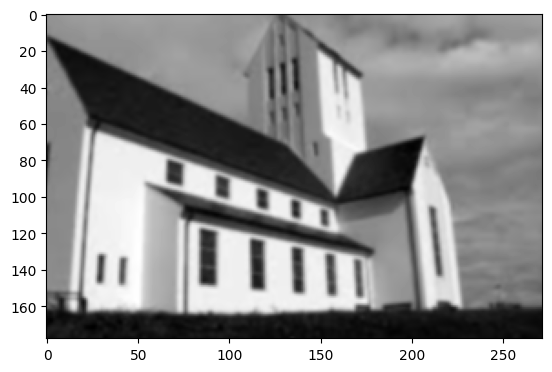

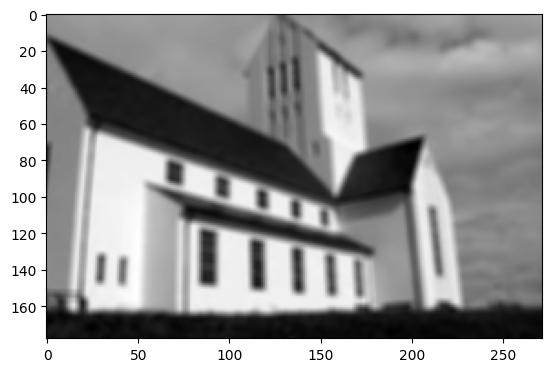

In [2]:
def convolution(image:np.ndarray, kernel:np.ndarray):
	image_h = image.shape[0]
	image_w = image.shape[1]
	
	kernel_h = kernel.shape[0]
	kernel_w = kernel.shape[1]
		
	h = kernel_h // 2
	w = kernel_w // 2
	
	image_conv = np.zeros(image.shape)
	
	for i in range(h, image_h-h):
		for j in range(w, image_w-w):
			x = image[i-h:i-h+kernel_h, j-w:j-w+kernel_w]
			image_conv[i][j] = np.dot(x.flatten(),kernel.flatten()).sum()
	
	return image_conv[h:-h,w:-w]

def GaussianKernel(filter_size:int, sigma:int):
	gaussian_filter = np.zeros((filter_size, filter_size))
	m = filter_size//2
	n = filter_size//2
	
	for x in range(-m, m+1):
		for y in range(-n, n+1):
			x1 = np.sqrt(2*np.pi)*sigma
			x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
			gaussian_filter[x+m, y+n] = (1/x1)*x2
	return gaussian_filter
gaussian_kernel_5_1 = GaussianKernel(5, 1)
gaussian_kernel_5_2 = GaussianKernel(5, 2)
blured_img_1 = convolution(my_image, gaussian_kernel_5_1)
blured_img_2 = convolution(my_image, gaussian_kernel_5_2)
plt.imshow(blured_img_1,cmap="grey")
plt.show()
plt.imshow(blured_img_2,cmap="grey")
plt.show()

1.b

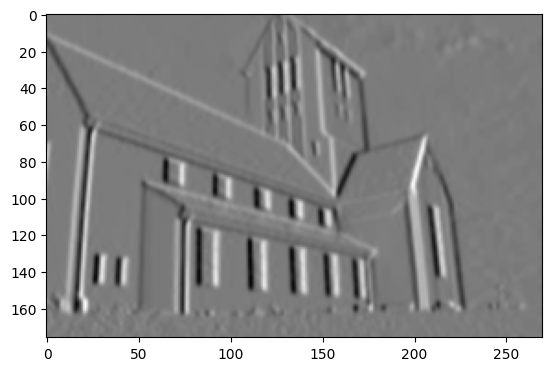

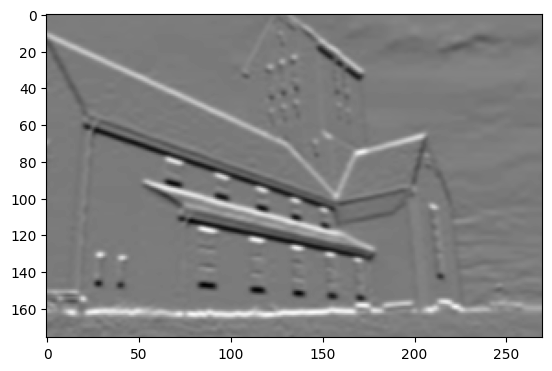

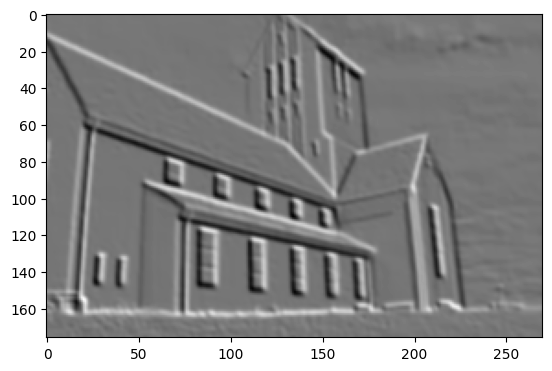

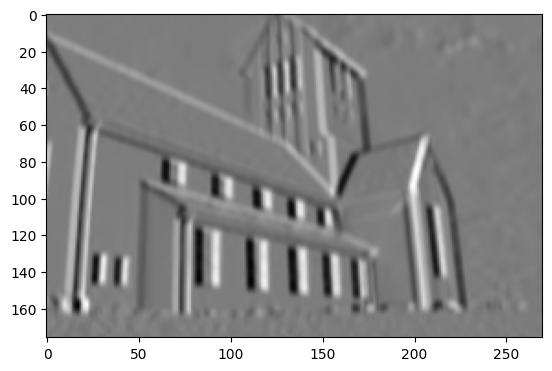

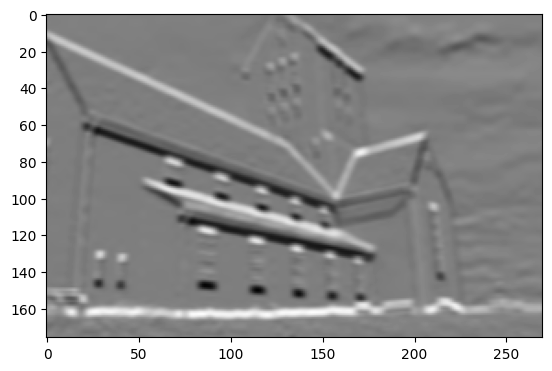

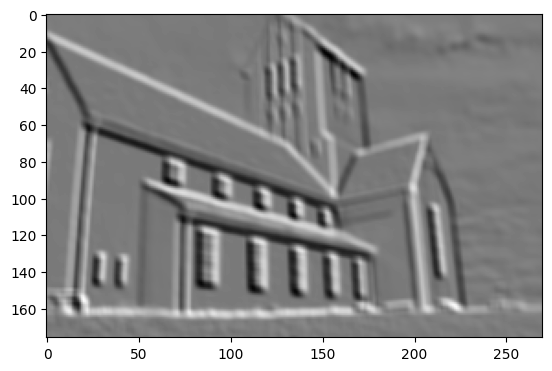

In [3]:
sobel_x = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1],
])*0.125
sobel_y = np.array([
    [1,2,1],
    [0,0,0],
    [-1,-2,-1],
])*0.125

sobel_img_x_1 = convolution(blured_img_1, sobel_x)
plt.imshow(sobel_img_x_1,cmap="grey")
plt.show()
sobel_img_y_1 = convolution(blured_img_1, sobel_y)
plt.imshow(sobel_img_y_1,cmap="grey")
plt.show()
sobel_img_1 = sobel_img_x_1 + sobel_img_y_1
plt.imshow(sobel_img_1,cmap="grey")
plt.show()

sobel_img_x_2 = convolution(blured_img_2, sobel_x)
plt.imshow(sobel_img_x_2,cmap="grey")
plt.show()
sobel_img_y_2 = convolution(blured_img_2, sobel_y)
plt.imshow(sobel_img_y_2,cmap="grey")
plt.show()
sobel_img_2 = sobel_img_x_2 + sobel_img_y_2
plt.imshow(sobel_img_2,cmap="grey")
plt.show()

1.c

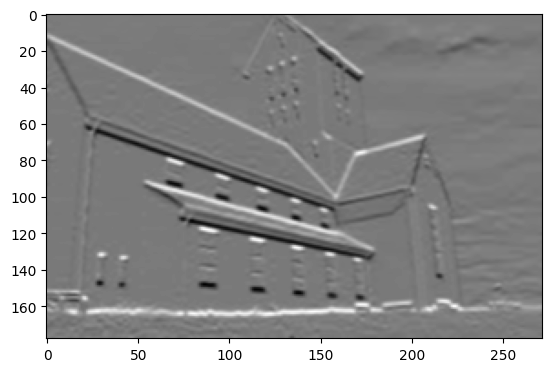

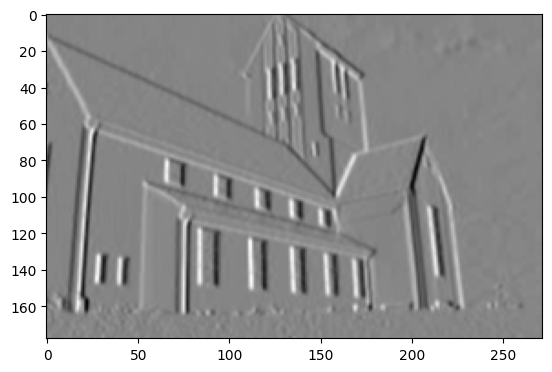

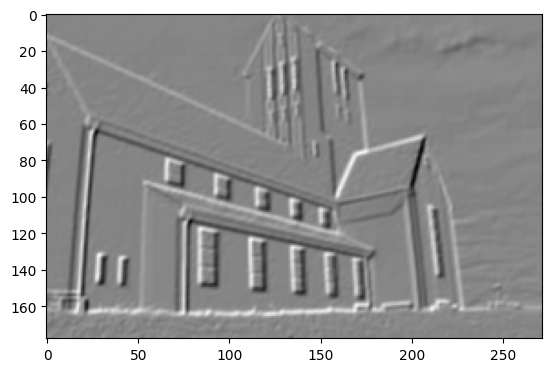

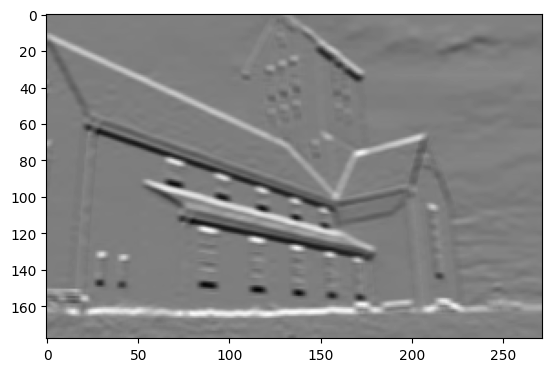

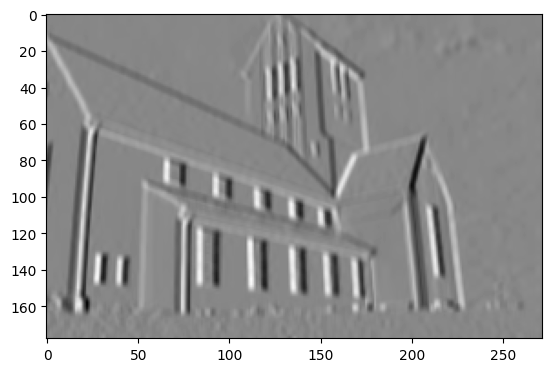

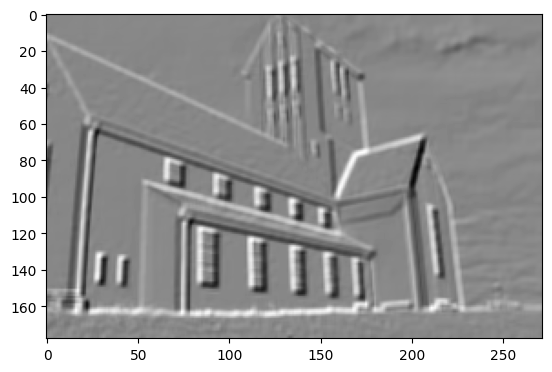

In [4]:
def DerivativeOfGaussianKernel(filter_size: int, sigma:int):
	derivative_filter_x = np.zeros((filter_size, filter_size))
	derivative_filter_y = np.zeros((filter_size, filter_size))
	m = filter_size//2
	n = filter_size//2
	
	for x in range(-m, m+1):
		for y in range(-n, n+1):
			x1 = sigma**2
			x2 = np.exp(-(x**2 + y**2)/(2* sigma**2))
			derivative_filter_x[x+m, y+n] = -(x/x1)*x2
			derivative_filter_y[x+m, y+n] = -(y/x1)*x2

	return derivative_filter_x, derivative_filter_y

derivative_filter_x_1, derivative_filter_y_1 = DerivativeOfGaussianKernel(5, 1)
derivative_img_x_1 = convolution(my_image, derivative_filter_x_1)
plt.imshow(derivative_img_x_1,cmap="grey")
plt.show()
derivative_img_y_1 = convolution(my_image, derivative_filter_y_1)
plt.imshow(derivative_img_y_1,cmap="grey")
plt.show()
derivative_filter_1 = derivative_img_x_1 + derivative_img_y_1
plt.imshow(derivative_filter_1,cmap="grey")
plt.show()

derivative_filter_x_2, derivative_filter_y_2 = DerivativeOfGaussianKernel(5, 2)
derivative_img_x_2 = convolution(my_image, derivative_filter_x_2)
plt.imshow(derivative_img_x_2,cmap="grey")
plt.show()
derivative_img_y_2 = convolution(my_image, derivative_filter_y_2)
plt.imshow(derivative_img_y_2,cmap="grey")
plt.show()
derivative_filter_2 = derivative_img_x_2 + derivative_img_y_2
plt.imshow(derivative_filter_2,cmap="grey")
plt.show()


1.d

1. The sobel edge detection was able to find edges that the derivation gaussian edge detection couldnt find.
2. derivation gaussian edge detection have some clearer edges compares to sobel edge detection
3. derivation gaussian edge detection hallucinated some edges in small areas of walls (area on the tower where windows are closely packed with each other)
4. derivation gaussian edge detection however have less noise around edges then sobel edge detection, where image compression would normally create a lot of noise

2.

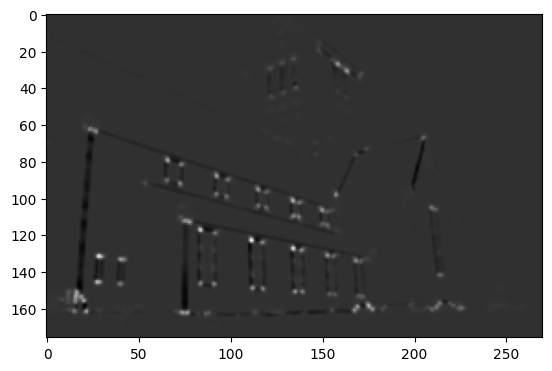

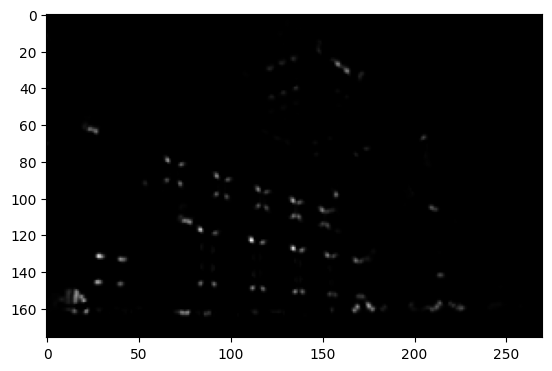

In [6]:
corner_threshould = 10000
k = 0.04

my_sobel_x = convolution(my_image, sobel_x)
my_sobel_y = convolution(my_image, sobel_y)
Ixx = convolution(my_sobel_x**2, gaussian_kernel_5_1)
Iyy = convolution(my_sobel_y**2, gaussian_kernel_5_1)
Ixy = convolution(my_sobel_x*my_sobel_y, gaussian_kernel_5_1)
harris_response = Ixx * Iyy - Ixy**2 - k * (Ixx + Iyy)**2
plt.imshow(harris_response,cmap="grey")
plt.show()


non_max_suppress = np.where(harris_response > corner_threshould, harris_response, 0)
plt.imshow(non_max_suppress,cmap="grey")
plt.show()